## Simple linear regression

Generate the x points in a uniform way:

In [2]:
library(data.table)


n = 100

# generate the x points
x <- runif(n,-10,10)

Parameters of our model

In [3]:
a = 2
b = 3.5

sigma = 1.5

Generative model


In [4]:
y <- x*a + b + rnorm(n, 0, sd = sigma)

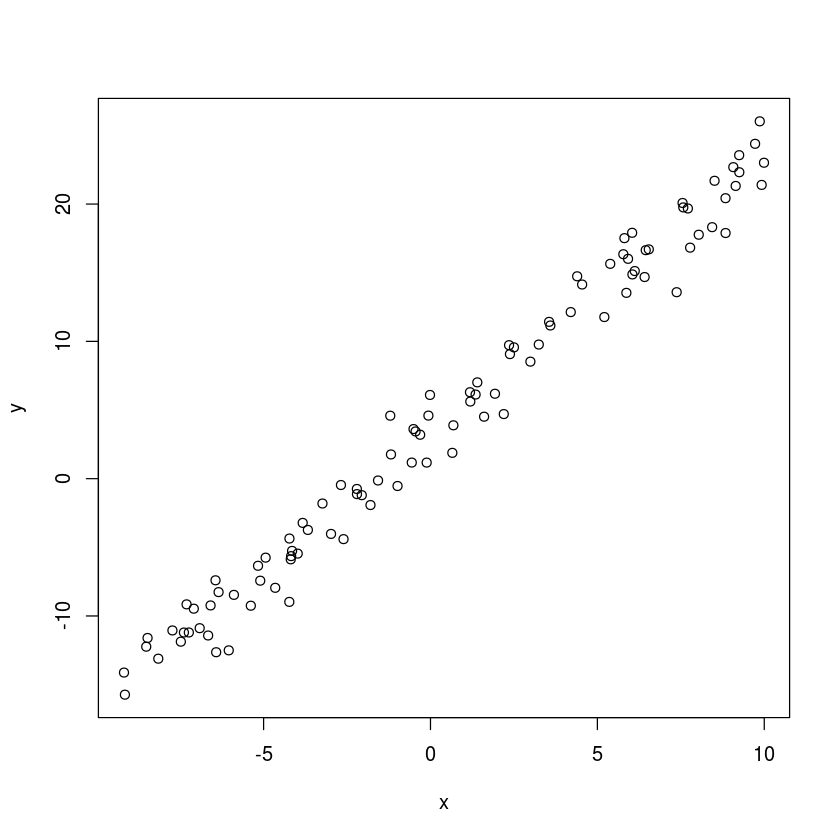

In [5]:
plot(x,y)


In [6]:
library(rstan)

stan_data = list(n = n,
                 x = x,
                 y = y)

fit <- stan("basic_linear_regression.stan", data = stan_data, chains = 2, 
            iter = 5000, warmup = 2000, thin = 10)

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/home/guillermo/bayesian_excercise/bayesian-programming-exercises/linear_models/basic_linear_regression.stan'”


SAMPLING FOR MODEL 'basic_linear_regression' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Warmup)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Warmup)
Chain 1: Iteration: 2001 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.072387 seconds (Warm-up)
Chain 1:                0.186483 seconds (Sampling)
Chain 1:  

Distribution of the posterior sample:

In [7]:
print(fit, pars=c("a", "b", "sigma", "lp__"), probs=c(.1,.5,.9))


Inference for Stan model: basic_linear_regression.
2 chains, each with iter=5000; warmup=2000; thin=10; 
post-warmup draws per chain=300, total post-warmup draws=600.

        mean se_mean   sd     10%    50%    90% n_eff Rhat
a       2.01    0.00 0.03    1.97   2.01   2.05   621    1
b       3.34    0.01 0.16    3.13   3.33   3.55   650    1
sigma   1.66    0.00 0.11    1.52   1.65   1.81   638    1
lp__  -98.95    0.05 1.24 -100.48 -98.67 -97.73   512    1

Samples were drawn using NUTS(diag_e) at Mon Dec 24 14:40:57 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


It's quite close to the real parameters:

ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


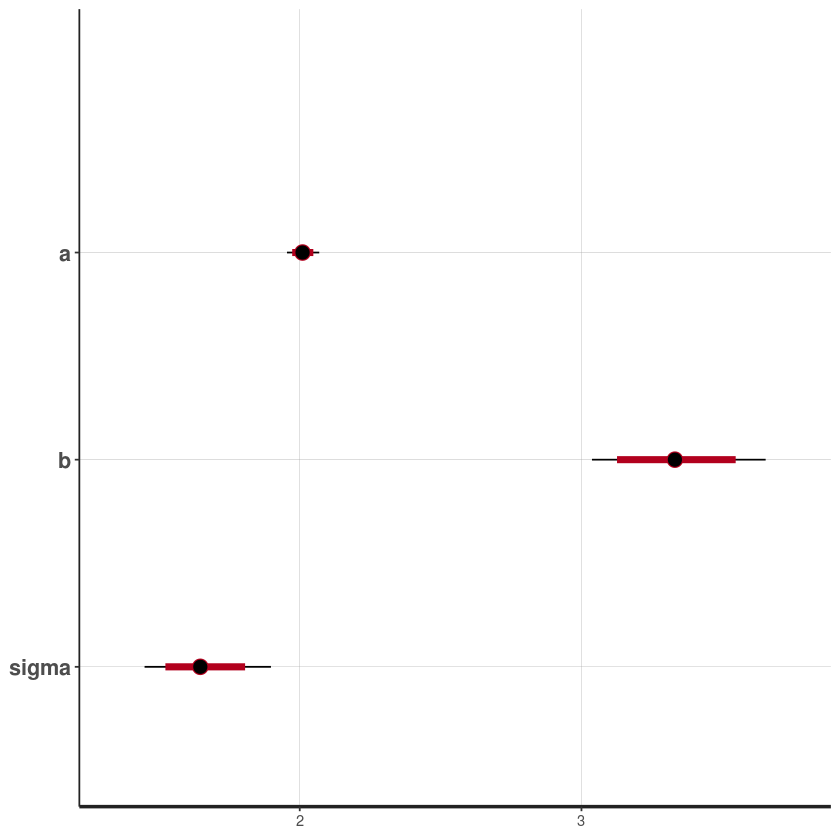

In [8]:
plot(fit)


Let's inspect visually the evolution of the chains:

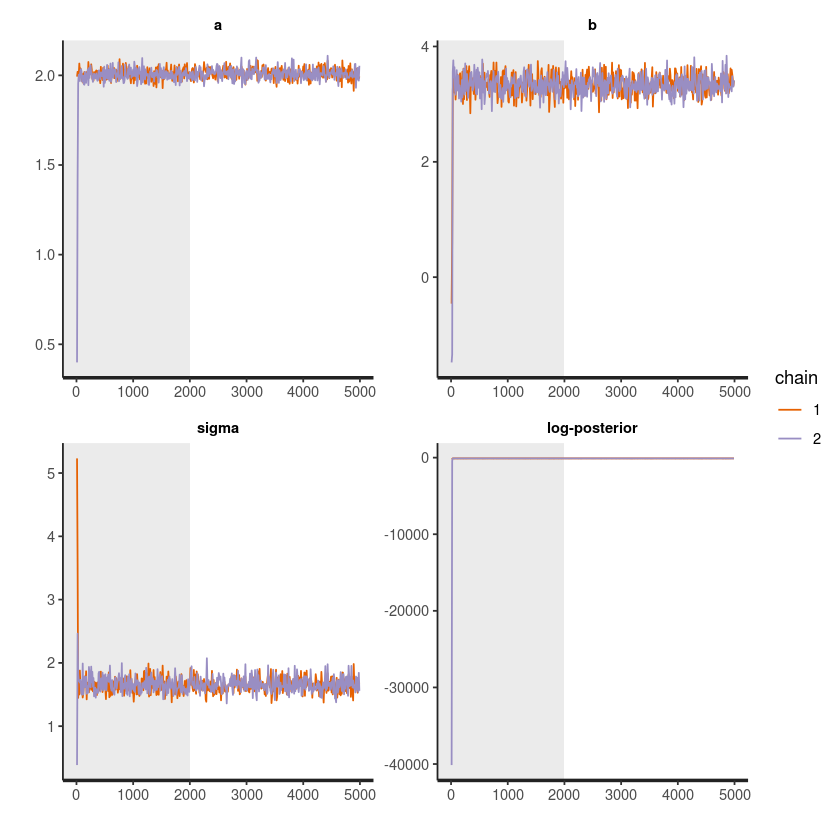

In [9]:
traceplot(fit, pars = c("a", "b","sigma","lp__"), inc_warmup = TRUE, nrow = 2)


The chains seem to be stable after the first iterations (that are in the warmup and therefore no considered in the posterior sample). Furthermore, both seem to converge to the same high density area. Let's inspect some diagnostics about the convergence:

In [10]:
sampler_params <- get_sampler_params(fit, inc_warmup = TRUE)

In [11]:
# each chain separately
lapply(sampler_params, summary, digits = 2)

[[1]]
 accept_stat__    stepsize__     treedepth__   n_leapfrog__   divergent__   
 Min.   :0.00   Min.   :0.011   Min.   :1.0   Min.   : 1.0   Min.   :0.000  
 1st Qu.:0.78   1st Qu.:0.812   1st Qu.:2.0   1st Qu.: 3.0   1st Qu.:0.000  
 Median :0.91   Median :0.812   Median :2.0   Median : 3.0   Median :0.000  
 Mean   :0.84   Mean   :0.907   Mean   :2.3   Mean   : 7.2   Mean   :0.004  
 3rd Qu.:0.99   3rd Qu.:0.937   3rd Qu.:2.0   3rd Qu.: 7.0   3rd Qu.:0.000  
 Max.   :1.00   Max.   :4.529   Max.   :6.0   Max.   :91.0   Max.   :1.000  
    energy__  
 Min.   : 98  
 1st Qu.: 99  
 Median :100  
 Mean   :101  
 3rd Qu.:102  
 Max.   :214  

[[2]]
 accept_stat__    stepsize__     treedepth__   n_leapfrog__  divergent__   
 Min.   :0.00   Min.   :0.002   Min.   :1.0   Min.   : 1    Min.   :0.000  
 1st Qu.:0.84   1st Qu.:0.737   1st Qu.:2.0   1st Qu.: 3    1st Qu.:0.000  
 Median :0.95   Median :0.737   Median :2.0   Median : 3    Median :0.000  
 Mean   :0.86   Mean   :0.826   Mean   

The number of divergent transitions is 0. It seems like we could increase the `acceptance probability`. Finally, let's explore the posterior samples with more detail:

In [12]:
res <- as.data.table(fit)

In [13]:
head(res)

a,b,sigma,lp__
1.978708,3.402492,1.917767,-100.33908
1.967859,3.310220,1.656715,-98.50105
2.014072,3.285058,1.768202,-98.20242
2.036510,3.426597,1.663457,-98.18296
2.040902,3.109459,1.587635,-99.11177
2.034104,3.146402,1.552519,-98.79238


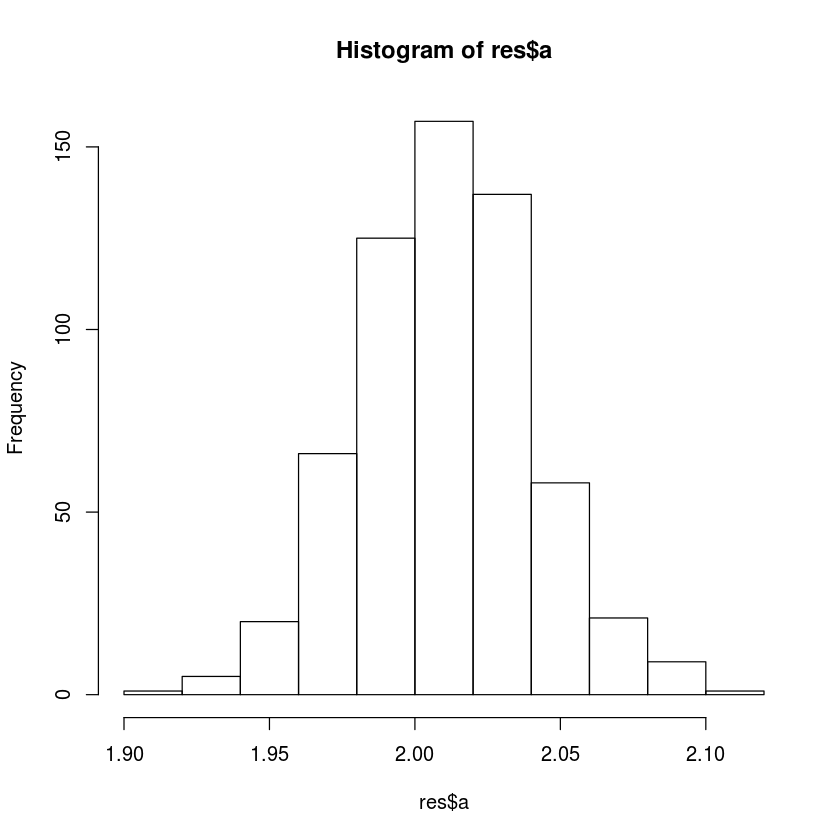

In [14]:
res <- as.data.table(fit)
hist(res$a)

In [15]:
tmp <- res[, c("a", "b", "sigma")]


Attaching package: ‘psych’

The following object is masked from ‘package:rstan’:

    lookup

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



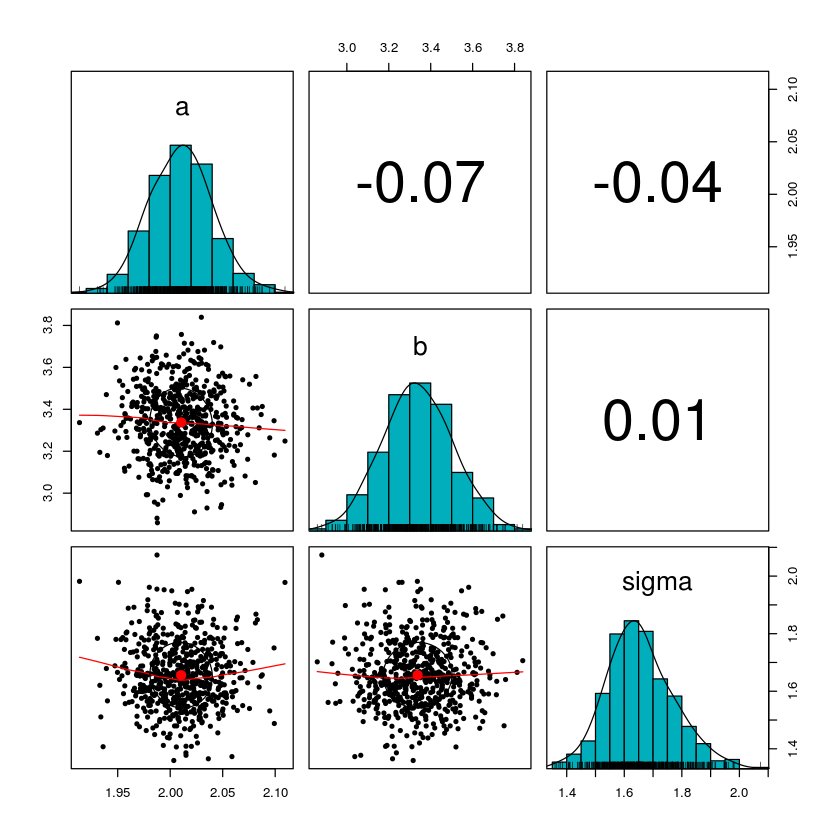

In [16]:
library(psych)

pairs.panels(tmp, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)


Finally, let's sample pairs of `a` and `b` parameters from the posterior and plot the corresponding linear regressors:

In [17]:
sample_rows <- sample.int(nrow(res),200,replace = TRUE)
sample <- res[sample_rows]


For each pair of `a` and `b`, predict the `y` of `x`:

In [18]:
ys = mapply(function(a,b) { lapply(x,function(x) a*x+ b)},a = sample$a,b = sample$b)

In [19]:
ys = unlist(do.call(rbind,ys))

In [20]:
linear_regressions = data.table(x = rep(x,100),y = ys, id = unlist(lapply(X = 1:length(x),function(x) rep(x,100))))

In the following figure, we plot the original data (points in black) with the linear regressors generated by taking 200 random samples of the parameters `a` and `b` (in blue) together with the line with the real parameters. We can see that the variance of those regressors is very low and they fit the points regardless of their noise.

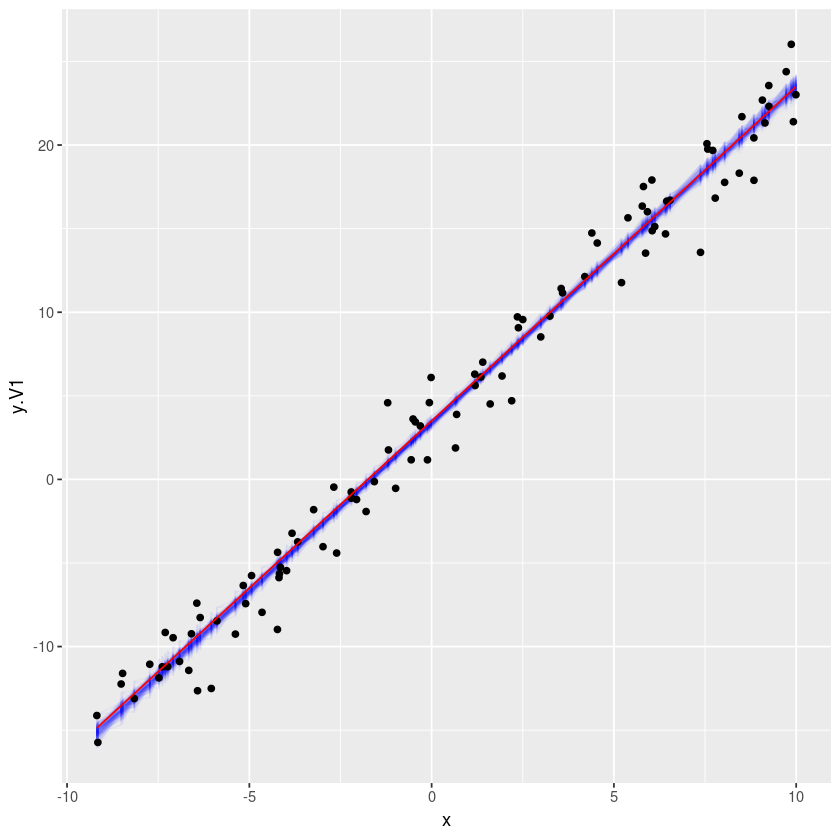

In [23]:
ggplot(linear_regressions) + geom_line(aes ( x = x,y = y.V1,group = id),alpha = 0.04,color = "blue") + geom_point(aes( x= x, y = y),data = data.table(x = x,y = y)) + geom_line(aes( x= x, y = y),data = data.table(x = x,y = a*x+b),color = "red") 

Finally, let's fit a *frequentist* linear model:

In [24]:
lm(x ~y)


Call:
lm(formula = x ~ y)

Coefficients:
(Intercept)            y  
    -1.6210       0.4884  
